In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lls import LinearLeastSquare

In [2]:
data=pd.read_csv("input/abalone.csv")

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data['Sex']=data['Sex'].replace(["F","M","I"],[0,1,2])

data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [4]:
data=data.drop(['Sex'],axis=1)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


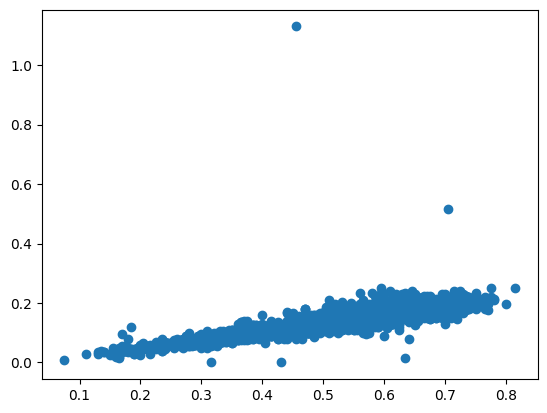

In [5]:
plt.scatter(data['Length'],data['Height'])
plt.show()

# LLS

In [6]:
X_train=np.array(data[['Length']])
Y_train=np.array(data[['Height']])

print(X_train.shape)
print(Y_train.shape)

(4177, 1)
(4177, 1)


In [7]:
# X_train=X_train.reshape(-1,1)


In [11]:
# from sklearn.model_selection import train_test_split
from mosa_sklearn import train_test_split
from numpy.linalg import inv

X_train, X_test, Y_train, Y_test=train_test_split(X_train,Y_train,test_size=0.2,shuffle=True)

In [9]:
# W= (X_train.T*X_train)^-1*X.T*Y

# w=np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)),X_train.T),Y_train)
#   ravesh digar

w=inv(X_train.T @ X_train)@ X_train.T @Y_train


w


array([[0.267048]])

In [10]:
Y_pred= X_test@ w

In [11]:
lls= LinearLeastSquare()
lls.fit(X_train,Y_train)

Y_predd=lls.predict(X_test)

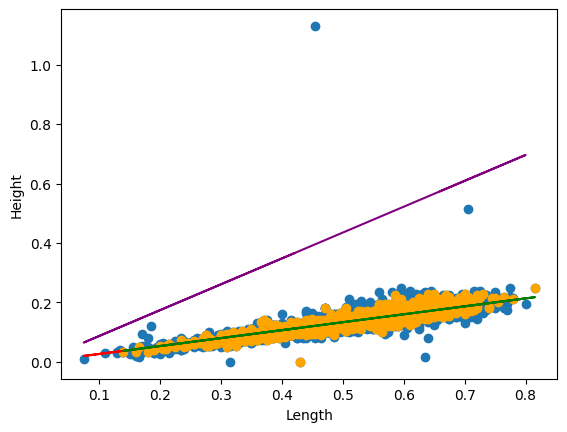

In [12]:
plt.scatter(data['Length'],data['Height'])
plt.scatter(X_test,Y_test,color='orange')
plt.plot(X_train,w*X_train,color='red')
plt.plot(X_test,Y_predd,color='green')
plt.plot(X_train,0.87*X_train,color='purple')
plt.xlabel('Length')
plt.ylabel('Height')
plt.show()

In [13]:
loss = lls.evaluate(Y_test,Y_predd,'mae')
loss

0.01301903290913826

In [14]:
new_length= 0.49
x=new_length

y_pred= w* x

height=y_pred

print(height)

[[0.13085352]]


In [15]:
#classification

# dar classification bayad daghighan pred va test yeksan bashand ta accuracy balatar ravad

Y_test= np.array([2,3,4,5,3,1])
Y_pred= np.array([2,1,4,4,5,1])

accuray= np.sum(Y_test==Y_pred)/len(Y_test)
accuray

0.5

In [16]:
# regression

Y_test= np.array([210,330,400,500,300,199])
Y_pred= np.array([200,300,440,500,300,200])

accuray= np.sum(Y_test==Y_pred)/len(Y_test)
accuray

# loss   خطا
#mean abs loss    or  mean abs error(MAE)      in pytorch called L1LOSS
mae=np.sum(np.abs(Y_test-Y_pred))/len(Y_test)

print(mae)

mse=np.sum((Y_test-Y_pred)**2)/len(Y_test)
print(mse)

13.5
433.5
